# **<font size=4 color=#BB3D00 face=微软雅黑>噪声中延迟信号的互相关</font>**

## **<font size=3  face=微软雅黑>※Matlab案例</font>** 

网址：https://ww2.mathworks.cn/help/signal/ug/cross-correlation-of-delayed-signal-in-noise.html     
描述：本案例由1个示例构成
### - <font color=DarkOrChid size=3>示例：如何使用互相关序列来检测噪声损坏序列中的时间延迟</font>

## **<font size=3 face=微软雅黑>※Python案例</font>**

针对以上案例，采用Python语言实现。

### - <font color=DarkOrChid size=3>示例：如何使用互相关序列来检测噪声损坏序列中的时间延迟</font>

输出序列是具有加法白高斯噪声的输入序列的延迟版本。创建两个序列。一个序列是另一个序列的延迟版本。延迟为 3 个样本。延迟信号的白噪声。使用样本互相关序列来检测滞后。

创建并绘制信号。将随机数生成器设置为默认设置，以获得可重现的结果。

In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
xx = np.zeros([20,1])
x = np.arange(0.05,1,0.1)
x = np.r_[x,x[::-1]]
xx[:,0] = x
xx.shape

(20, 1)

In [11]:
y = np.zeros([3,1])
y.shape
y = np.r_[y,xx]
y = y+0.3*np.random.randn(len(x)+3,1)

<StemContainer object of 3 artists>

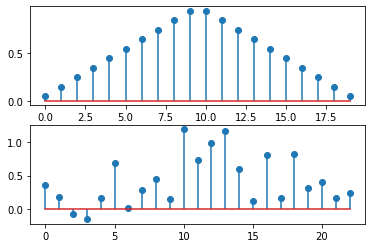

In [12]:
plt.subplot(2,1,1)
plt.stem(x)
plt.subplot(2,1,2)
plt.stem(y)

In [13]:
def xcorr(x,y,timelaggy):
    x = x.flatten()
    y = y.flatten()
    out = np.correlate(x,y,'full')
    midIndex = int(len(out)/2)
    mid = out[midIndex]
    autocor = out/mid
    if timelaggy>len(out)/2:
        autocor = autocor
        lags = np.linspace(-len(out)/2,len(out)/2,2*len(out)+1  )
    else :
        autocor = autocor[midIndex-timelaggy:midIndex+timelaggy]
        lags = np.arange(-timelaggy,timelaggy,1)
    return autocor,lags

获取样本互相关序列，并使用最大绝对值来估计滞后。绘制样本互相关序列。正如预期的那样，最大互相关序列值出现在滞后 3 处。

In [14]:
xc,lags = xcorr(y,x,21)
I = np.argmax(np.abs(xc))
lags[I]

1

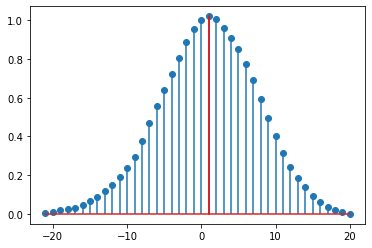

In [15]:
plt.stem(lags,xc)
plt.plot([lags[I],lags[I]],[xc[I],0],'r')

In [16]:
I = np.argmax(np.abs(xc))
lags[I]

1